In [2]:

#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from matplotlib.pyplot import figure
import numpy as np



In [9]:
import re
import ast

In [4]:

# Reading csv file from directory
abnb_1 = pd.read_csv('../AIRBNB_DATA/ABNB_data.csv', header=1)


In [11]:
#Call the info method on abnb_data to see a summary of the data
abnb_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36905 entries, 0 to 36904
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   1                                             36905 non-null  int64  
 1   id                                            36905 non-null  int64  
 2   listing_url                                   36905 non-null  object 
 3   scrape_id                                     36905 non-null  float64
 4   last_scraped                                  36905 non-null  object 
 5   name                                          36892 non-null  object 
 6   description                                   35637 non-null  object 
 7   neighborhood_overview                         23087 non-null  object 
 8   picture_url                                   36905 non-null  object 
 9   host_id                                       36905 non-null 

In [7]:
# Dropping unwanted features/columns
abnb_2 = abnb_1.drop(['1','listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url','host_location', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'bathrooms','minimum_minimum_nights','maximum_minimum_nights',
 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated', 'has_availability',
 'availability_30', 'availability_60','availability_90','availability_365','calendar_last_scraped', 'license','calculated_host_listings_count',
'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 'minimum_nights','maximum_nights', 'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'description', 'neighborhood_overview'], axis = 1, inplace = False)

In [8]:
# Renaming column

abnb_2 = abnb_2.rename(columns = {'id': 'Listing #'})


In [9]:
abnb_2.head()

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month
0,2595,Skylit Midtown Castle,2845,Jennifer,9/9/2008,A New Yorker since 2000! My passion is creatin...,within a few hours,87%,24%,f,...,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",$150.00,48,0,0,11/21/2009,11/4/2019,94.0,f,0.35
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,12/7/2008,Laid-back Native New Yorker (formerly bi-coast...,within an hour,83%,94%,f,...,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",$76.00,396,80,2,9/30/2014,3/19/2021,89.0,f,4.98
2,5121,BlissArtsSpace!,7356,Garon,2/3/2009,"I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,...,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",$60.00,50,0,0,5/28/2009,12/2/2019,90.0,f,0.35
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,2/3/2009,"Rebecca is an artist/designer, and Henoch is i...",within a few hours,100%,NaN,f,...,"[""Kitchen"", ""Cable TV"", ""TV"", ""Carbon monoxide...",$175.00,1,0,0,1/2/2014,1/2/2014,97.0,f,0.01
4,5178,Large Furnished Room Near B'way,8967,Shunichi,3/3/2009,I used to work for a financial industry but no...,within a day,100%,100%,f,...,"[""Heating"", ""Bed linens"", ""TV"", ""Iron"", ""Free ...",$79.00,474,1,0,5/6/2009,9/25/2020,84.0,f,3.26


In [10]:
# Displaying all the columns(without truncation)
pd.set_option('display.max_columns', None) 
abnb_2.head()

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month
0,2595,Skylit Midtown Castle,2845,Jennifer,9/9/2008,A New Yorker since 2000! My passion is creatin...,within a few hours,87%,24%,f,t,Midtown,Manhattan,40.75356,-73.98559,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",$150.00,48,0,0,11/21/2009,11/4/2019,94.0,f,0.35
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,12/7/2008,Laid-back Native New Yorker (formerly bi-coast...,within an hour,83%,94%,f,t,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",$76.00,396,80,2,9/30/2014,3/19/2021,89.0,f,4.98
2,5121,BlissArtsSpace!,7356,Garon,2/3/2009,"I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in apartment,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",$60.00,50,0,0,5/28/2009,12/2/2019,90.0,f,0.35
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,2/3/2009,"Rebecca is an artist/designer, and Henoch is i...",within a few hours,100%,NaN,f,f,Sunset Park,Brooklyn,40.66265,-73.99454,Entire apartment,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Carbon monoxide...",$175.00,1,0,0,1/2/2014,1/2/2014,97.0,f,0.01
4,5178,Large Furnished Room Near B'way,8967,Shunichi,3/3/2009,I used to work for a financial industry but no...,within a day,100%,100%,f,f,Midtown,Manhattan,40.76457,-73.98317,Private room in apartment,Private room,2,1 bath,1.0,1.0,"[""Heating"", ""Bed linens"", ""TV"", ""Iron"", ""Free ...",$79.00,474,1,0,5/6/2009,9/25/2020,84.0,f,3.26


Following will check the dtypes of data and format them aptly.
- With Bathrooms feature
1. splitting integer from text to find number of bathrooms
2. stringss like 'Half-bath' will be replaced with 0.5
3. data type will be changed to float

In [11]:

abnb_2['bathrooms_text'].value_counts()


1 bath               19005
1 shared bath         9377
2 baths               2153
1 private bath        2134
2 shared baths        1097
1.5 baths             1054
1.5 shared baths       737
2.5 baths              292
3 baths                224
0 shared baths         173
3 shared baths         111
2.5 shared baths        89
3.5 baths               66
4 baths                 54
4 shared baths          44
0 baths                 38
Half-bath               34
Shared half-bath        20
4.5 baths               19
Private half-bath       16
5 baths                 10
6 baths                  7
6 shared baths           7
5.5 baths                5
8 baths                  4
7.5 baths                3
6.5 shared baths         3
4.5 shared baths         3
3.5 shared baths         3
7 baths                  2
5 shared baths           2
6.5 baths                1
5.5 shared baths         1
15.5 baths               1
7 shared baths           1
9.5 baths                1
Name: bathrooms_text, dtype:

In [12]:
#splitting integer from text to find number of bathrooms
abnb_2['bathrooms_text'] = abnb_2['bathrooms_text'].str.split(n=0, expand=True)
abnb_2['bathrooms_text'].value_counts()

1            30516
2             3250
1.5           1791
2.5            381
3              335
0              211
4               98
3.5             69
Half-bath       34
4.5             22
Shared          20
Private         16
6               14
5               12
5.5              6
6.5              4
8                4
7                3
7.5              3
15.5             1
9.5              1
Name: bathrooms_text, dtype: int64

In [13]:
#stringss like 'Half-bath' will be replaced with 0.5
abnb_2['bathrooms_text1'] = abnb_2['bathrooms_text'].str.replace('Half-bath', '0.5')
abnb_2['bathrooms_text2'] = abnb_2['bathrooms_text1'].str.replace('Shared', '0.5')
abnb_2['bathrooms_text3'] = abnb_2['bathrooms_text2'].str.replace('Private', '0.5')

abnb_2['bathrooms_text3'].value_counts()

1       30516
2        3250
1.5      1791
2.5       381
3         335
0         211
4          98
0.5        70
3.5        69
4.5        22
6          14
5          12
5.5         6
6.5         4
8           4
7           3
7.5         3
9.5         1
15.5        1
Name: bathrooms_text3, dtype: int64

In [31]:
# data type changed to float
abnb_2['bathrooms_number'] = abnb_2['bathrooms_text3'].astype('float')
abnb_2['bathrooms_number'].value_counts()

1.0     30516
2.0      3250
1.5      1791
2.5       381
3.0       335
0.0       211
4.0        98
0.5        70
3.5        69
4.5        22
6.0        14
5.0        12
5.5         6
6.5         4
8.0         4
7.5         3
7.0         3
15.5        1
9.5         1
Name: bathrooms_number, dtype: int64

Features like name, host_name, host_since, host_about will be changed to string types

In [32]:
# More features
# string features (Not sure how I will use them in my modeling, but for the time being I keep them as strings)
abnb_2['name'] = abnb_2['name'].astype('string')
abnb_2['host_name'] = abnb_2['host_name'].astype('string')
abnb_2['host_since'] = abnb_2['host_since'].astype('string')
abnb_2['host_about'] = abnb_2['host_about'].astype('string')

In [33]:
# Creating dummy variables for categorical variables (these can be later merged with the main dataframe)
df_host_response_time = pd.get_dummies(abnb_2['host_response_time'], prefix='host_response_time')
df_neighbourhood_group = pd.get_dummies(abnb_2['neighbourhood_group_cleansed'], prefix = 'neighbourhood_group')
df_room_type = pd.get_dummies(abnb_2['room_type'], prefix = 'room_type')


In [34]:
df_neighbourhood_group.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [35]:
#Recoding binary variables of t,f into 1 and 0
abnb_2['instant_bookable'] = abnb_2['instant_bookable'].replace(['t','f'],[1,0])
abnb_2['host_is_superhost'] = abnb_2['host_is_superhost'].replace(['t','f'],[1,0]) ### problem here!!!

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [36]:
abnb_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36905 entries, 0 to 36904
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Listing #                     36905 non-null  int64         
 1   name                          36892 non-null  string        
 2   host_id                       36905 non-null  int64         
 3   host_name                     35637 non-null  string        
 4   host_since                    36905 non-null  string        
 5   host_about                    21243 non-null  string        
 6   host_response_time            18662 non-null  object        
 7   host_response_rate            18662 non-null  float64       
 8   host_acceptance_rate          20185 non-null  float64       
 9   host_is_superhost             35637 non-null  float64       
 10  host_identity_verified        35637 non-null  object        
 11  neighbourhood_cleansed      

In [37]:
# Changing features to datetime objects (using code from Datacamp)
abnb_2['first_review'] = pd.to_datetime(abnb_2['first_review'], infer_datetime_format=True, errors = 'coerce')
abnb_2['last_review'] = pd.to_datetime(abnb_2['last_review'], infer_datetime_format=True, errors = 'coerce')
abnb_2['host_since'] = pd.to_datetime(abnb_2['host_since'],infer_datetime_format=True, errors = 'coerce')

In [38]:
# Price feature
abnb_2['price'].head()

0    150.0
1     76.0
2     60.0
3    175.0
4     79.0
Name: price, dtype: float64

In [39]:
#replacing $ and , in price
# change it to float
abnb_2['price'] = abnb_2['price'].str.replace('$', '')
abnb_2['price'] = abnb_2['price'].str.replace(',', '')
abnb_2['price'] = abnb_2['price'].astype('float')
abnb_2['price'].dtype

AttributeError: Can only use .str accessor with string values!

In [40]:
# replacing % 
abnb_2['host_response_rate'] = abnb_2['host_response_rate'].str.replace('%', '').astype('float')/100
abnb_2['host_acceptance_rate'] = abnb_2['host_acceptance_rate'].str.replace('%', '').astype('float')/100
abnb_2['host_response_rate']

AttributeError: Can only use .str accessor with string values!

In [41]:
abnb_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36905 entries, 0 to 36904
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Listing #                     36905 non-null  int64         
 1   name                          36892 non-null  string        
 2   host_id                       36905 non-null  int64         
 3   host_name                     35637 non-null  string        
 4   host_since                    35637 non-null  datetime64[ns]
 5   host_about                    21243 non-null  string        
 6   host_response_time            18662 non-null  object        
 7   host_response_rate            18662 non-null  float64       
 8   host_acceptance_rate          20185 non-null  float64       
 9   host_is_superhost             35637 non-null  float64       
 10  host_identity_verified        35637 non-null  object        
 11  neighbourhood_cleansed      

In [42]:
abnb_2['amenities'].head()

0    ["Refrigerator", "Essentials", "Cleaning befor...
1    ["Bathtub", "Smoke alarm", "Dishes and silverw...
2    ["Kitchen", "Heating", "Wifi", "Long term stay...
3    ["Kitchen", "Cable TV", "TV", "Carbon monoxide...
4    ["Heating", "Bed linens", "TV", "Iron", "Free ...
Name: amenities, dtype: object

In [43]:
# checking the nature of 'amenities' data
abnb_2['amenities'].iloc[1]

'["Bathtub", "Smoke alarm", "Dishes and silverware", "Carbon monoxide alarm", "Dedicated workspace", "Pack \\u2019n Play/travel crib", "Heating", "Coffee maker", "Wifi", "TV", "Iron", "Extra pillows and blankets", "Cooking basics", "Stove", "Essentials", "High chair", "Refrigerator", "Shampoo", "Baby safety gates", "Luggage dropoff allowed", "Children\\u2019s books and toys", "Kitchen", "Fire extinguisher", "Oven", "Long term stays allowed", "Hair dryer", "Microwave", "Hot water", "Free street parking", "Air conditioning", "Lockbox", "Free parking on premises", "Cable TV", "Bed linens", "Hangers"]'

In [44]:
# calculating length of amenities to check the number of amenities it has
abnb_2['num_amenities'] = abnb_2['amenities'].str.split(',').str.len()
abnb_2['num_amenities'].head()

0    31
1    35
2     5
3    11
4    18
Name: num_amenities, dtype: int64

Following will focus on managing missing Data

In [45]:
# Calculating the number of missing values and % of missingness
missing = pd.concat([abnb_2.isnull().sum(), 100 * abnb_2.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Listing #,0,0.000000
instant_bookable,0,0.000000
number_of_reviews_l30d,0,0.000000
number_of_reviews_ltm,0,0.000000
number_of_reviews,0,0.000000
price,0,0.000000
amenities,0,0.000000
room_type,0,0.000000
property_type,0,0.000000
longitude,0,0.000000


It turns out that host_acceptance rate, host response rate and response time have around 50% missingness. In addition, all 7 types of review scores has around 30% missingness. Need to make sure if they miss on a random basis, or if the missingness has any association with other features.

In [46]:
# used a technique learned in DataCamp missing data management
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
#msno.matrix(missing)
#plt.show()

# checking if the missing values of host_response_rate has any systematic relation with other features Here I have shown work for 'host_reponse_rate' variable. We can do this for other 2 features too.
# Basically it will check if the summary statistics of other features have any difference between host_response_rate missing and non missing values.
# Instead of showing all features, I chose to show the features that show differences in them (that way. it's easier to follow)

missing_rr = abnb_2[abnb_2['host_response_rate'].isna()]
complete_rr = abnb_2[~abnb_2['host_response_rate'].isna()]
print(missing_rr[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']].describe())
print(complete_rr[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']].describe())


       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d
count       18243.000000           18243.000000            18243.000000
mean           14.465165               0.398893                0.021159
std            33.760540               2.962269                0.263422
min             0.000000               0.000000                0.000000
25%             0.000000               0.000000                0.000000
50%             3.000000               0.000000                0.000000
75%            11.000000               0.000000                0.000000
max           481.000000             116.000000               12.000000
       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d
count       18662.000000           18662.000000            18662.000000
mean           30.687922               4.769692                0.513986
std            57.556478              14.785192                1.654820
min             0.000000               0.000000                0

In [47]:
print(missing_rr['room_type'].value_counts())
print(complete_rr[ 'room_type'].value_counts())

Private room       9081
Entire home/apt    8740
Shared room         347
Hotel room           75
Name: room_type, dtype: int64
Entire home/apt    10503
Private room        7628
Shared room          324
Hotel room           207
Name: room_type, dtype: int64


In [48]:
print(missing_rr['host_is_superhost'].value_counts())
print(complete_rr[ 'host_is_superhost'].value_counts())

0.0    15592
1.0     1383
Name: host_is_superhost, dtype: int64
0.0    13709
1.0     4953
Name: host_is_superhost, dtype: int64


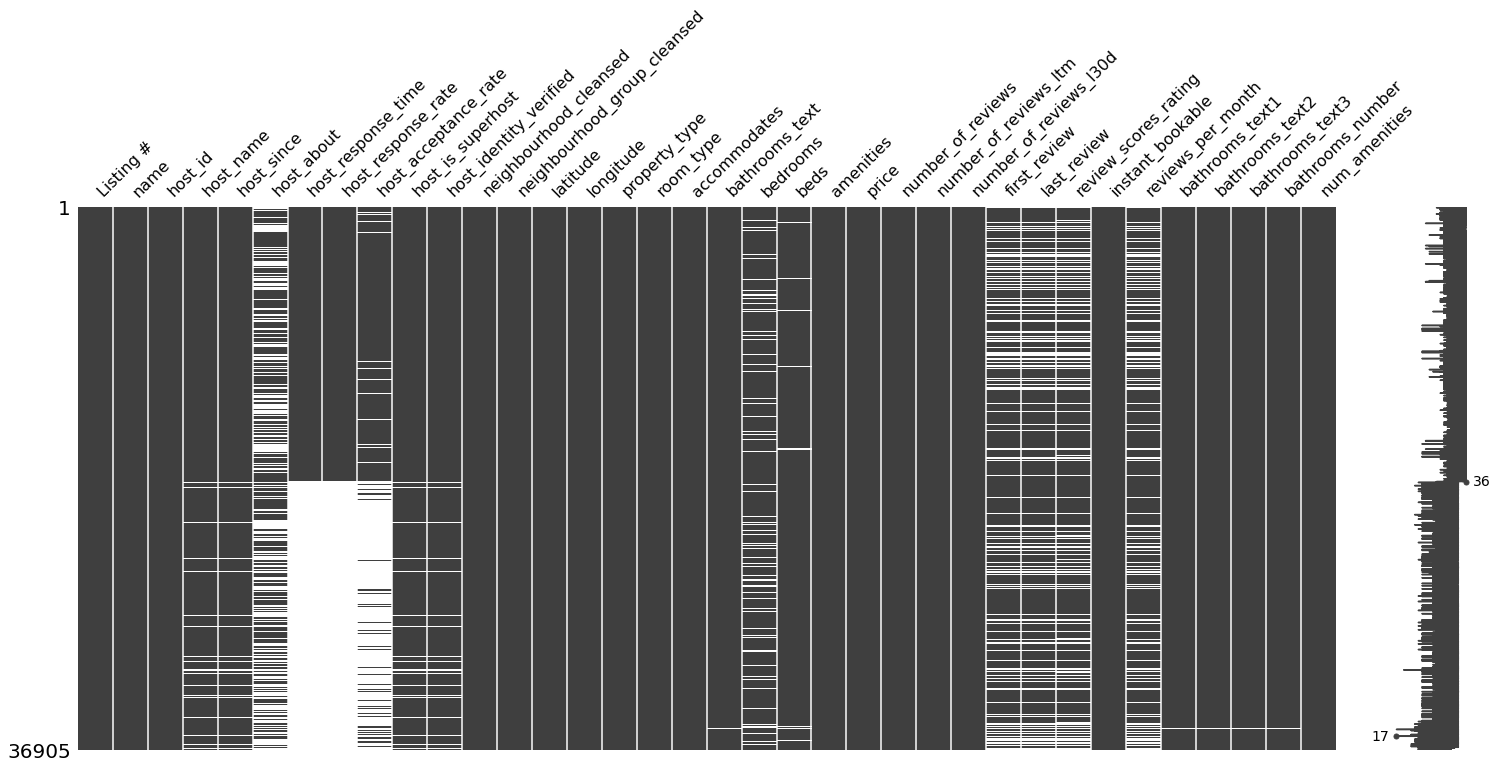

In [49]:
abnb_2_sorted = abnb_2.sort_values(by='host_response_rate', ascending='False')
msno.matrix(abnb_2_sorted)
plt.show()

After reviewing this diagram, it could be decided that host_acceptance_rate, host_response_rate and host_response_time miss together, for the most part (meaning, if either one of them is missing, other is also missing in general). Other than that their missingness doesn't show any significant relation with other features. However, looking at the differences in summary statistics (among numeric variables), number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d and age differ significantly among missing and non_missing values of host_response_rate. Also among the category variables, host_is_superhost differs significantly. That is, among the missing data with host_reponse_rate, being a super_host is only around one-fourth of the complete data with response_rate. In summary, this may imply that the ones with missing values of host_response_rate, host_acceptance_rate and host_response-time must have been occupied less than those with non-null values.

However, imputing missing values for 50% of data will not be worthwhile. However, a dummy variable could be introduced to take account of these differences. Can also drop all those missing values.
Update: Further online search reveals that high response rate, and acceptance rate may play role in becoming a super-host. Since if superhost/nlot feature is already there, may be we don;t have to use these features.

In [50]:
# For observations that didn't have first_review and last_review, the review scores_rating were also missing
abnb_2[(abnb_2['first_review'].isnull()) & (abnb_2['last_review'].isnull()) & (~abnb_2['review_scores_rating'].isnull())]


,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities


In [51]:
# To check observations that didn't have response rate but had acceptance rate
abnb_2[(abnb_2['host_response_rate'].isnull()) & (~abnb_2['host_acceptance_rate'].isnull())]

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities
11,7750,2 Furnished bedrooms next to Central Park,17985,Sing,2009-05-20,"Textile Designer, Art curator in New York City.",NaN,NaN,0.00,0.0,t,East Harlem,Manhattan,40.79607,-73.94949,Private room in apartment,Private room,1,1,2.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Heating"", ""Wifi...",96.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,8
25,13394,Fort Greene brownstone,52335,Alexander,2009-11-08,"my father is a painter, engineer, translator ...",NaN,NaN,1.00,1.0,t,Fort Greene,Brooklyn,40.69222,-73.97336,Private room in apartment,Private room,2,1,1.0,1.0,"[""Kitchen"", ""Refrigerator"", ""Microwave"", ""Esse...",80.0,143,0,0,2010-01-01,2020-03-19,94.0,0,1.04,1,1,1,1.0,17
30,15341,"Bright 1bd Nolita Apt, Doorman, Elevator, Secu...",60049,Ted,2009-12-04,Hello and thank you for checking out my sublet...,NaN,NaN,1.00,1.0,t,Nolita,Manhattan,40.72297,-73.99684,Entire condominium,Entire home/apt,3,1,1.0,2.0,"[""Cable TV"", ""Refrigerator"", ""Shower gel"", ""Es...",170.0,26,1,0,2013-10-01,2020-10-14,91.0,0,0.28,1,1,1,1.0,38
43,17747,BLUE TRIM GUEST HOUSE,68599,George,2010-01-07,"“I came to your shore as a stranger, I lived i...",NaN,NaN,1.00,1.0,t,Clinton Hill,Brooklyn,40.68503,-73.96555,Private room in apartment,Private room,2,1,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Dryer"", ""Long ...",95.0,128,0,0,2010-03-07,2020-03-08,99.0,0,0.95,1,1,1,1.0,39
76,28907,Garden studio in the Upper East Sid,124352,Lisa,2010-05-13,I am from NYC.,NaN,NaN,0.00,0.0,f,Upper East Side,Manhattan,40.77827,-73.94669,Entire apartment,Entire home/apt,4,1,1.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Carbon monoxide...",150.0,21,0,0,2010-06-01,2017-08-15,99.0,0,0.16,1,1,1,1.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36289,48695176,Elegant Bedroom & Living room with kitchenette,392844922,Audrey,2021-03-16,<NA>,NaN,NaN,1.00,0.0,t,Rosedale,Queens,40.64719,-73.73164,Private room in house,Private room,2,1,1.0,1.0,"[""TV"", ""Carbon monoxide alarm"", ""Essentials"", ...",104.0,0,0,0,NaT,NaT,NaN,1,NaN,1,1,1,1.0,15
36708,48976059,Luxury 1 bedroom w/balcony in a Brand new buil...,91571876,Lena,2016-08-23,<NA>,NaN,NaN,0.90,0.0,t,Midwood,Brooklyn,40.61982,-73.96137,Entire apartment,Entire home/apt,3,1,1.0,1.0,"[""Kitchen"", ""TV"", ""Hot water"", ""Carbon monoxid...",111.0,0,0,0,NaT,NaT,NaN,1,NaN,1,1,1,1.0,15
36719,48980681,1 bedroom apartment on Upper East Side Manhattan,395032236,Osten,2021-03-31,From Sweden but lived in Manhattan for more th...,NaN,NaN,1.00,0.0,t,Upper East Side,Manhattan,40.76999,-73.95338,Entire apartment,Entire home/apt,3,1,1.0,2.0,"[""Kitchen"", ""TV"", ""Hot water"", ""Hangers"", ""Ess...",141.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,12
36882,49075960,Charming quiet east side studio,395330345,Mira,2021-04-03,<NA>,NaN,NaN,1.00,0.0,t,Midtown,Manhattan,40.75753,-73.95929,Entire condominium,Entire home/apt,2,1,NaN,1.0,"[""Kitchen"", ""Hot water"", ""Carbon monoxide alar...",85.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,14


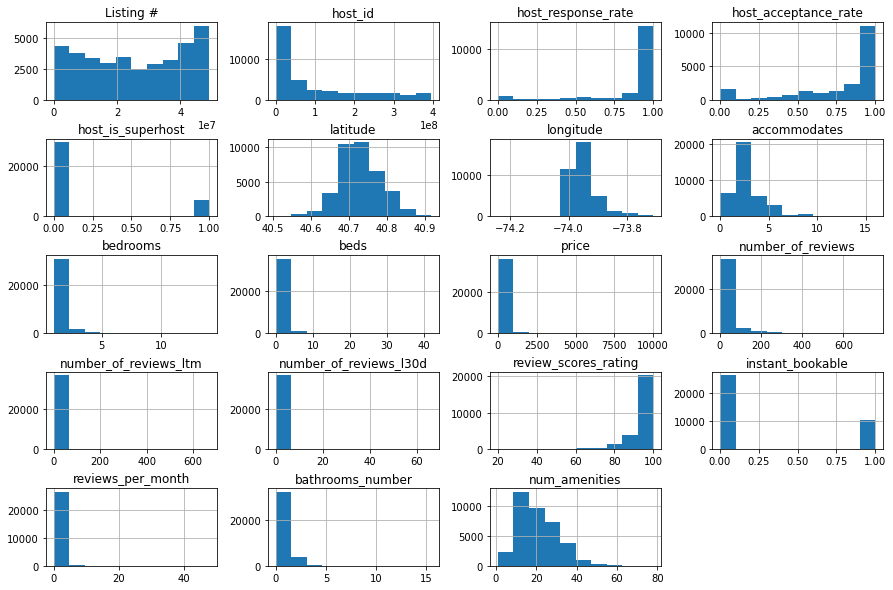

In [40]:
# Here I will focus on outliers in features
# making histograms to show the distribution of features
abnb_2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [52]:
abnb_2['price'].describe()

count    36905.000000
mean       148.559274
std        290.379973
min          0.000000
25%         61.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

In [53]:
neighborhood_price_means = abnb_2.groupby('neighbourhood_group_cleansed')['price'].mean()
neighborhood_price_means.head()

neighbourhood_group_cleansed
Bronx             99.308000
Brooklyn         123.275224
Manhattan        188.572297
Queens           101.837407
Staten Island    111.761092
Name: price, dtype: float64

In [43]:
neighborhood_price_means.index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group_cleansed')

Since the price feature was highly skewed to the right, it was categorized into 3 different groups namely 'Low', 'Medium', and'High' prices to check their distribution clearly.

In [54]:
abnb_2['price_bucket'] = pd.cut(abnb_2['price'], bins=[0, 150, 1000, 10000], labels = ['Low', 'Medium', 'High'])
abnb_2['price_bucket'].head()



0       Low
1       Low
2       Low
3    Medium
4       Low
Name: price_bucket, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

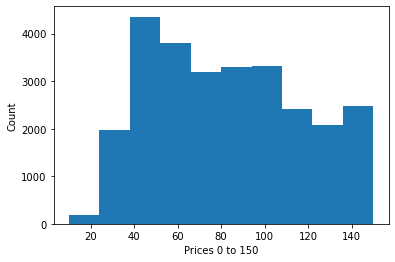

In [55]:
abnb_2_0to150 = abnb_2[abnb_2['price_bucket'] == 'Low']

plt.hist(abnb_2_0to150['price'], bins=10)
plt.xlabel('Prices 0 to 150')
plt.ylabel('Count')
plt.show()


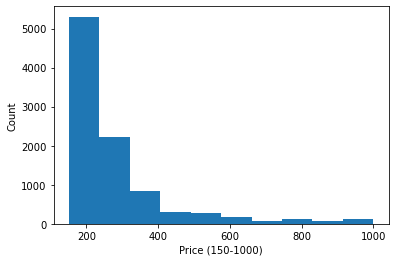

In [56]:
abnb_2_150to1000 = abnb_2[abnb_2['price_bucket'] == 'Medium']
plt.hist(abnb_2_150to1000['price'], bins=10)
plt.xlabel('Price (150-1000)')
plt.ylabel('Count')
plt.show()


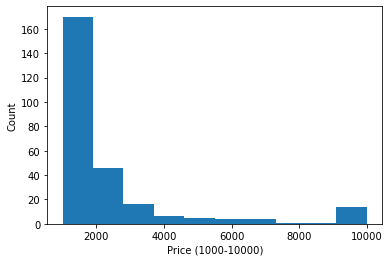

In [47]:
abnb_2_1000to10000 = abnb_2[abnb_2['price_bucket'] == 'High']
plt.hist(abnb_2_1000to10000['price'], bins=10)
plt.xlabel('Price (1000-10000)')
plt.ylabel('Count')
plt.show()

In [57]:
# calculating the % of prices that are greater than $1000 
########## DO percentile and drop based on that...1% would be better###########################
m = abnb_2[abnb_2['price'] > 1000].count()
missing_percent = print((m/36905)*100)

Listing #                       0.723479
name                            0.723479
host_id                         0.723479
host_name                       0.709931
host_since                      0.709931
host_about                      0.409159
host_response_time              0.406449
host_response_rate              0.406449
host_acceptance_rate            0.419997
host_is_superhost               0.709931
host_identity_verified          0.709931
neighbourhood_cleansed          0.723479
neighbourhood_group_cleansed    0.723479
latitude                        0.723479
longitude                       0.723479
property_type                   0.723479
room_type                       0.723479
accommodates                    0.723479
bathrooms_text                  0.720770
bedrooms                        0.690963
beds                            0.712641
amenities                       0.723479
price                           0.723479
number_of_reviews               0.723479
number_of_review

Price has maximum value of 10,000. But 75th percentile value is only $160. Only around 0.7% of listings have a price above $1000. An option is we can simply drop the values above $1000 as it accounts for very minimal % of data, else we can segment the data into quartiles based on prices and examine the models.
For the time being let's drop price values higher than $1000.

In [58]:
#Checking descriptives for other features
abnb_2['review_scores_rating'].describe()
abnb_2[abnb_2['review_scores_rating'] == 20]

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities,price_bucket
1982,1925519,Sublet: $490/Wk,2765870,Amarie2131,2012-06-27,x,NaN,NaN,NaN,0.0,t,Lower East Side,Manhattan,40.72118,-73.99096,Private room in apartment,Private room,1,1,1.0,1.0,"[""Kitchen"", ""TV"", ""Essentials"", ""Hangers"", ""Wi...",80.0,1,0,0,2015-11-01,2015-11-01,20.0,0,0.02,1,1,1,1.0,10,Low
3631,4244476,Sunny and Funky Greenpoint Room,782008,Lori,2011-07-05,his is Lori - my (Hidden by Airbnb) and other ...,NaN,NaN,NaN,0.0,t,Greenpoint,Brooklyn,40.73093,-73.95332,Private room in apartment,Private room,2,1,1.0,1.0,"[""Kitchen"", ""TV"", ""Carbon monoxide alarm"", ""Es...",75.0,1,0,0,2015-07-10,2015-07-10,20.0,0,0.01,1,1,1,1.0,10,Low
5560,6807836,Beautiful large double room in Brooklyn,2136825,Guadalupe,2012-04-14,Let's see...I love traveling! When I travel I ...,NaN,NaN,NaN,0.0,t,Flatbush,Brooklyn,40.64133,-73.95771,Private room in apartment,Private room,2,1,1.0,2.0,"[""Kitchen"", ""TV"", ""Hangers"", ""Washer"", ""Dryer""...",84.0,3,0,0,2017-08-26,2018-09-01,20.0,1,0.07,1,1,1,1.0,13,Low
5617,6887405,Private Room in Comfy NYC Apt!,11081099,Rob,2014-01-06,<NA>,NaN,NaN,NaN,0.0,t,Harlem,Manhattan,40.82872,-73.94538,Private room in apartment,Private room,2,1,1.0,1.0,"[""Kitchen"", ""Cable TV"", ""Essentials"", ""Heating...",50.0,1,0,0,2015-06-27,2015-06-27,20.0,0,0.01,1,1,1,1.0,9,Low
6072,7433174,Apt.-private entrance -Townhouse- 10mins. to JFK,34789416,Carl,2015-06-01,Theatre Manager for a Community based Theatre....,NaN,NaN,NaN,0.0,t,Laurelton,Queens,40.67261,-73.75254,Private room in house,Private room,2,1,1.0,1.0,"[""EV charger"", ""Refrigerator"", ""Hot water"", ""C...",115.0,1,0,0,2018-06-16,2018-06-16,20.0,0,0.03,1,1,1,1.0,19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36054,48508010,Best room in Brooklyn! Super Comfortable & Cozy!,299366926,Daniel,2019-10-01,<NA>,within an hour,0.84,1.00,0.0,t,Bushwick,Brooklyn,40.68712,-73.90954,Private room in apartment,Private room,2,2,1.0,NaN,"[""Kitchen"", ""Keypad"", ""Security cameras on pro...",50.0,2,2,2,2021-03-14,2021-03-17,20.0,1,2.00,2,2,2,2.0,15,Low
36161,48590114,"Comfort room close to subway, 20 mins to Mid-town",366469896,Fiona,2020-09-07,<NA>,within an hour,1.00,1.00,0.0,t,Astoria,Queens,40.76804,-73.92340,Private room in apartment,Private room,2,1,1.0,NaN,"[""Kitchen"", ""Carbon monoxide alarm"", ""Essentia...",57.0,1,1,1,2021-03-23,2021-03-23,20.0,1,1.00,1,1,1,1.0,13,Low
36209,48623547,Spacious & Charmy 3 BR in Manhattan,392209664,Florentin,2021-03-12,<NA>,within a few hours,0.97,0.91,0.0,t,East Harlem,Manhattan,40.79850,-73.94151,Entire apartment,Entire home/apt,6,1,3.0,3.0,"[""Cable TV"", ""Refrigerator"", ""Shower gel"", ""Es...",180.0,1,1,1,2021-03-25,2021-03-25,20.0,1,1.00,1,1,1,1.0,32,Medium
36234,48641676,A+ Location Duplex Suite,348619646,Nomad,2020-06-03,We are delighted to accommodate you during you...,within an hour,1.00,0.99,0.0,t,Midtown,Manhattan,40.74681,-73.98897,Entire apartment,Entire home/apt,7,1,NaN,5.0,"[""Refrigerator"", ""Shower gel"", ""Essentials"", ""...",146.0,1,1,1,2021-03-23,2021-03-23,20.0,1,1.00,1,1,1,1.0,25,Low


In [59]:
#checking the missing review_scores_rating
abnb_2.loc[abnb_2['review_scores_rating'].isnull()]

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities,price_bucket
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,2009-05-07,A former life in fashion and wellness has left...,NaN,NaN,NaN,0.0,t,East Harlem,Manhattan,40.80107,-73.94255,Private room in condominium,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Security cameras on property"", ""H...",65.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,19,Low
11,7750,2 Furnished bedrooms next to Central Park,17985,Sing,2009-05-20,"Textile Designer, Art curator in New York City.",NaN,NaN,0.00,0.0,t,East Harlem,Manhattan,40.79607,-73.94949,Private room in apartment,Private room,1,1,2.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Heating"", ""Wifi...",96.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,8,Low
19,11943,Country space in the city,45445,Harriet,2009-10-12,<NA>,NaN,NaN,NaN,0.0,f,Flatbush,Brooklyn,40.63702,-73.96327,Private room in house,Private room,1,1,1.0,2.0,"[""Kitchen"", ""Heating"", ""Washer"", ""Dryer"", ""Wif...",150.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,8,Low
111,45935,Room in Beautiful Townhouse.,204586,L,2010-08-17,<NA>,NaN,NaN,NaN,0.0,f,Mott Haven,Bronx,40.80635,-73.92201,Private room in apartment,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Carbon monoxide alarm"", ""Hangers""...",60.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,12,Low
117,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,2010-09-16,I've lived in NYC for over 15 years and work i...,NaN,NaN,NaN,0.0,t,Upper East Side,Manhattan,40.77449,-73.95308,Private room in apartment,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Heating"", ""Wash...",130.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,Amenity-loaded Single Room in UWS,334376746,Sharedeasy,2020-02-07,SharedEasy is the only community-oriented Coli...,within an hour,1.00,1.00,0.0,t,Upper West Side,Manhattan,40.79949,-73.96118,Private room in apartment,Private room,1,3,1.0,1.0,"[""Kitchen"", ""Security cameras on property"", ""T...",46.0,0,0,0,NaT,NaT,NaN,1,NaN,3,3,3,3.0,19,Low
36901,49089512,Unfurnished 2BR Apartment in Upper East Side,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Upper East Side,Manhattan,40.78041,-73.94575,Entire apartment,Entire home/apt,2,1,2.0,0.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",98.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,23,Low
36902,49089765,Beautiful Renovated Sunny Jr. One Bed,387269117,Tal,2021-02-04,<NA>,within an hour,1.00,1.00,0.0,t,East Village,Manhattan,40.72511,-73.98222,Entire apartment,Entire home/apt,2,1,1.0,1.0,"[""Kitchen"", ""Refrigerator"", ""TV"", ""Hot water"",...",145.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,19,Low
36903,49091581,Furnished Bright Apartment in Hell's Kitchen,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,1,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",123.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,26,Low


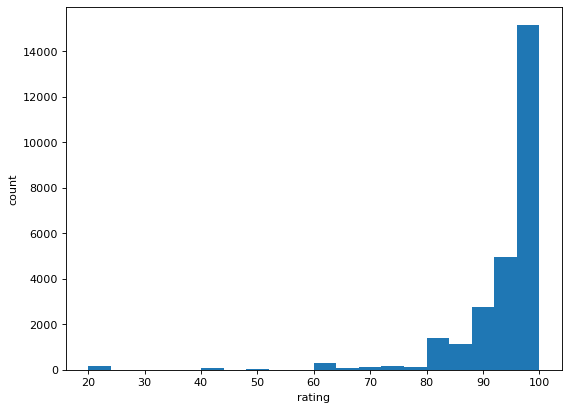

In [61]:
figure(figsize=(8, 6), dpi=80)
plt.hist(abnb_2['review_scores_rating'], bins=20)
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

Neightborhood_group as well as 'room_type' have an impact on price differences. There's a slight difference in price with 'instant_bookable'. Host_response_time shows an interesting association with price, for 'within a day' response the price is high and if it's 'few days or more', price reduces. However, if 'within few hours or within an hour the price is less than them. Whether the host_is_superhost or not doesn't show much difference in price, however, for a superhost, the number of reviews are high.

<function matplotlib.pyplot.show(close=None, block=None)>

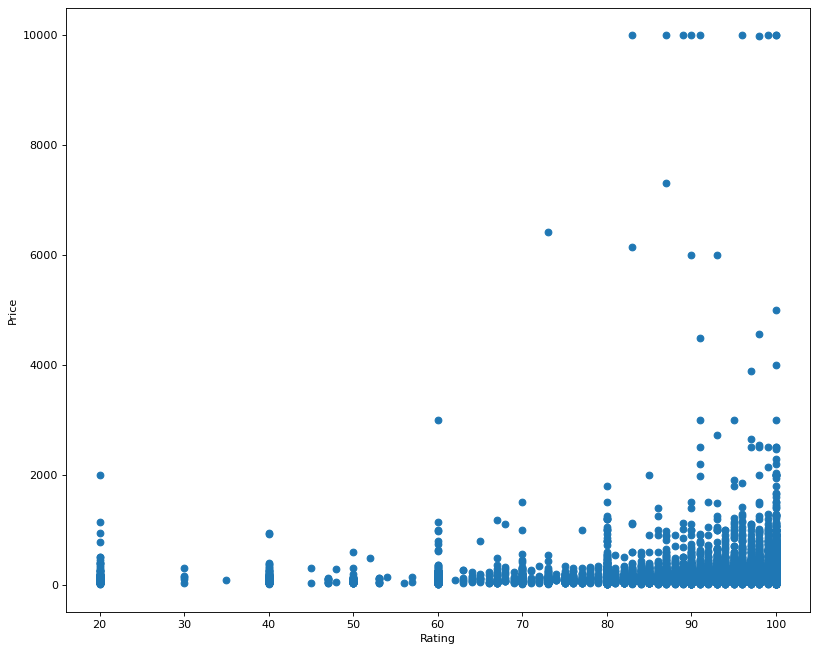

In [62]:
figure(figsize=(12, 10), dpi=80)
plt.scatter(abnb_2['review_scores_rating'], abnb_2['price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show

In [63]:
#checking the missing bedrooms
abnb_2.loc[abnb_2['bedrooms'].isnull()]['name'].head(50)
# Almost all of the null values of bedrooms indicate that the listings are studios and lofts, hence there's no bedrooms. Therefore they could be 
# replaced with 0s.

0                                   Skylit Midtown Castle
7                        Only 2 stops to Manhattan studio
12                       Sweet and Spacious Brooklyn Loft
14                                   Midtown Pied-a-terre
74                                 East Village Sanctuary
81                 Luminous Beautiful West Village Studio
107                    Creative South Williamsburg Studio
157                         Smallest House In The Village
179                  East Village Loft with Piano & Patio
235            Sunny Bklyn Jewel  Fort Greene APRIL  2021
249                       Riverside Charm with Fire Place
250     Nomad/Chelsea Loft Studio, big work space, 2 d...
259     Beautiful Harlem Studio Apartment - private ac...
264                      NYC Studio for Rent in Townhouse
275                                           Boho Studio
278                       Truly Amazing Oasis In The City
280                        Affordable Furnished Apartment
282           

In [64]:
#checking the missing values of first_review and last_reviews
abnb_2.loc[abnb_2['first_review'].isnull()]

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities,price_bucket
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,2009-05-07,A former life in fashion and wellness has left...,NaN,NaN,NaN,0.0,t,East Harlem,Manhattan,40.80107,-73.94255,Private room in condominium,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Security cameras on property"", ""H...",65.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,19,Low
11,7750,2 Furnished bedrooms next to Central Park,17985,Sing,2009-05-20,"Textile Designer, Art curator in New York City.",NaN,NaN,0.00,0.0,t,East Harlem,Manhattan,40.79607,-73.94949,Private room in apartment,Private room,1,1,2.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Heating"", ""Wifi...",96.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,8,Low
19,11943,Country space in the city,45445,Harriet,2009-10-12,<NA>,NaN,NaN,NaN,0.0,f,Flatbush,Brooklyn,40.63702,-73.96327,Private room in house,Private room,1,1,1.0,2.0,"[""Kitchen"", ""Heating"", ""Washer"", ""Dryer"", ""Wif...",150.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,8,Low
111,45935,Room in Beautiful Townhouse.,204586,L,2010-08-17,<NA>,NaN,NaN,NaN,0.0,f,Mott Haven,Bronx,40.80635,-73.92201,Private room in apartment,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Carbon monoxide alarm"", ""Hangers""...",60.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,12,Low
117,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,2010-09-16,I've lived in NYC for over 15 years and work i...,NaN,NaN,NaN,0.0,t,Upper East Side,Manhattan,40.77449,-73.95308,Private room in apartment,Private room,1,1,1.0,1.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Heating"", ""Wash...",130.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,Amenity-loaded Single Room in UWS,334376746,Sharedeasy,2020-02-07,SharedEasy is the only community-oriented Coli...,within an hour,1.00,1.00,0.0,t,Upper West Side,Manhattan,40.79949,-73.96118,Private room in apartment,Private room,1,3,1.0,1.0,"[""Kitchen"", ""Security cameras on property"", ""T...",46.0,0,0,0,NaT,NaT,NaN,1,NaN,3,3,3,3.0,19,Low
36901,49089512,Unfurnished 2BR Apartment in Upper East Side,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Upper East Side,Manhattan,40.78041,-73.94575,Entire apartment,Entire home/apt,2,1,2.0,0.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",98.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,23,Low
36902,49089765,Beautiful Renovated Sunny Jr. One Bed,387269117,Tal,2021-02-04,<NA>,within an hour,1.00,1.00,0.0,t,East Village,Manhattan,40.72511,-73.98222,Entire apartment,Entire home/apt,2,1,1.0,1.0,"[""Kitchen"", ""Refrigerator"", ""TV"", ""Hot water"",...",145.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,19,Low
36903,49091581,Furnished Bright Apartment in Hell's Kitchen,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,1,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",123.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,26,Low


In [65]:
# Imputing missing bed room values with 0
abnb_2['bedrooms'].fillna(0, inplace= True)

In [66]:
# Merging Dummy variables created earlier
abnb_3 = pd.concat([abnb_2, df_neighbourhood_group, df_room_type], axis=1)

In [67]:
# Checking if merged correctly
#abnb_3.head()
abnb_3.tail()

,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_text1,bathrooms_text2,bathrooms_text3,bathrooms_number,num_amenities,price_bucket,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
36900,49088566,Amenity-loaded Single Room in UWS,334376746,Sharedeasy,2020-02-07,SharedEasy is the only community-oriented Coli...,within an hour,1.00,1.00,0.0,t,Upper West Side,Manhattan,40.79949,-73.96118,Private room in apartment,Private room,1,3,1.0,1.0,"[""Kitchen"", ""Security cameras on property"", ""T...",46.0,0,0,0,NaT,NaT,NaN,1,NaN,3,3,3,3.0,19,Low,0,0,1,0,0,0,0,1,0
36901,49089512,Unfurnished 2BR Apartment in Upper East Side,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Upper East Side,Manhattan,40.78041,-73.94575,Entire apartment,Entire home/apt,2,1,2.0,0.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",98.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,23,Low,0,0,1,0,0,1,0,0,0
36902,49089765,Beautiful Renovated Sunny Jr. One Bed,387269117,Tal,2021-02-04,<NA>,within an hour,1.00,1.00,0.0,t,East Village,Manhattan,40.72511,-73.98222,Entire apartment,Entire home/apt,2,1,1.0,1.0,"[""Kitchen"", ""Refrigerator"", ""TV"", ""Hot water"",...",145.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,19,Low,0,0,1,0,0,1,0,0,0
36903,49091581,Furnished Bright Apartment in Hell's Kitchen,305240193,June,2019-10-29,"At June Homes, our mission is to make renting ...",within a few hours,0.99,0.46,0.0,t,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,1,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",123.0,0,0,0,NaT,NaT,NaN,0,NaN,1,1,1,1.0,26,Low,0,0,1,0,0,1,0,0,0
36904,49092532,Panoramic city views! 2/3 bdrms private terra...,154949847,Emily,2017-10-17,We are Emily and Robin and we started travelin...,within a few hours,0.97,0.16,0.0,t,Hell's Kitchen,Manhattan,40.77034,-73.99305,Entire apartment,Entire home/apt,6,2,2.0,3.0,"[""Essentials"", ""Dryer"", ""Long term stays allow...",299.0,0,0,0,NaT,NaT,NaN,0,NaN,2,2,2,2.0,22,Medium,0,0,1,0,0,1,0,0,0


In [68]:
# Dropping unwanted feature
abnb_3.drop(['bathrooms_text1', 'bathrooms_text2', 'bathrooms_text3'], axis = 1, inplace=True)

In [69]:
# Deleting extremely high price values (keep only prices upto 99th percentile)
np.percentile(abnb_3['price'], 99)
abnb_4 = abnb_3[abnb_3['price'] <= 946]

In [70]:
abnb_4['price'].describe()

count    36536.000000
mean       130.081016
std        110.216751
min          0.000000
25%         60.000000
50%        100.000000
75%        156.000000
max        946.000000
Name: price, dtype: float64

In [71]:
abnb_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36536 entries, 0 to 36904
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Listing #                          36536 non-null  int64         
 1   name                               36523 non-null  string        
 2   host_id                            36536 non-null  int64         
 3   host_name                          35275 non-null  string        
 4   host_since                         35275 non-null  datetime64[ns]
 5   host_about                         21034 non-null  string        
 6   host_response_time                 18447 non-null  object        
 7   host_response_rate                 18447 non-null  float64       
 8   host_acceptance_rate               19968 non-null  float64       
 9   host_is_superhost                  35275 non-null  float64       
 10  host_identity_verified            

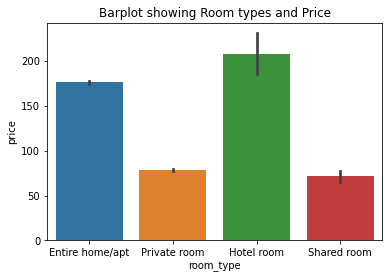

In [72]:
sns.barplot(x="room_type", y="price", data=abnb_4)
plt.title('Barplot showing Room types and Price')
plt.show()

In [62]:
# save the cleaned data to new csv file
abnb_4.to_csv(r'C:\Users\tnsub\Google Drive\SPRINGBOARD DSC\ABNB_Project\Notebooks\abnb_4_afterwrangling.csv')

Moving forward, planning to use features the following features for further analysis
Listing #                                     
host_is_superhost                        
latitude                                  
longitude                                    
accommodates                               
bedrooms                                  
beds                                     
amenities                                  
price                                     
number_of_reviews                         
number_of_reviews_ltm                      
number_of_reviews_l30d                      
first_review                       
last_review                        
review_scores_rating                      
instant_bookable                                
bathrooms_number                          
num_amenities                                  
neighbourhood_group_Bronx                   
neighbourhood_group_Brooklyn                
neighbourhood_group_Manhattan               
neighbourhood_group_Queens                  
neighbourhood_group_Staten Island           
room_type_Entire home/apt                  
room_type_Hotel room                        
room_type_Private room                     
room_type_Shared room               
